# Detecção de Anomalias

In [17]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sb  
from scipy.io import loadmat  

from scipy import stats 

%matplotlib inline

In [6]:
data = loadmat('data/ex8data1.mat')  
X = data['X']  
X.shape 

dataF = pd.DataFrame(X, columns=['Vazão', 'Latência'])
dataF.head()

,Vazão,Latência
0,13.046815,14.741152
1,13.408520,13.763270
2,14.195915,15.853181
3,14.914701,16.174260
4,13.576700,14.042849


### Visualizando os dados

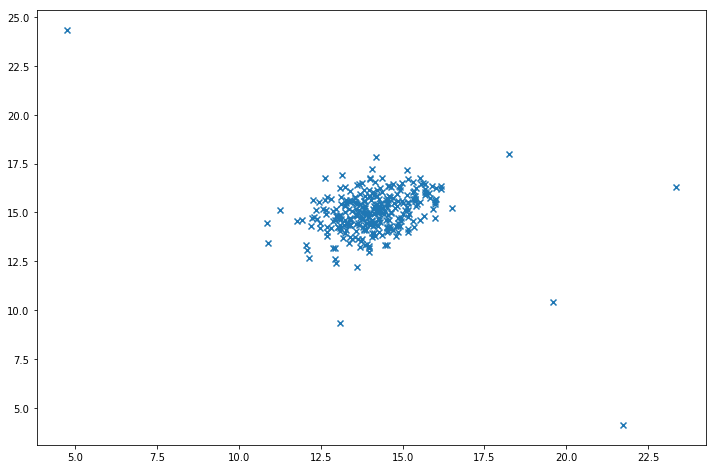

In [10]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(X[:,0], X[:,1], marker='x')  

In [11]:
def estimativa_gaussiana(X):  
    media = X.mean(axis=0)
    desvio = X.var(axis=0)

    return media, desvio

In [22]:
media, desvio = estimativa_gaussiana(X)

### Dados de Validação

In [15]:

Xval = data['Xval']  
yval = data['yval']

Xval.shape, yval.shape  

((307, 2), (307, 1))

### Normalizando os dados

In [23]:
dist = stats.norm(media[0], desvio[0])  

Calculando a probabilidade das 50 primeiras amostras estarem dentro de uma distribuição gaussiana

In [25]:
dist.pdf(X[:,0])[0:50]

array([ 0.183842  ,  0.20221694,  0.21746136,  0.19778763,  0.20858956,
        0.21652359,  0.16991291,  0.15123542,  0.1163989 ,  0.1594734 ,
        0.21716057,  0.21760472,  0.20141857,  0.20157497,  0.21711385,
        0.21758775,  0.21695576,  0.2138258 ,  0.21057069,  0.1173018 ,
        0.20765108,  0.21717452,  0.19510663,  0.21702152,  0.17429399,
        0.15413455,  0.21000109,  0.20223586,  0.21031898,  0.21313426,
        0.16158946,  0.2170794 ,  0.17825767,  0.17414633,  0.1264951 ,
        0.19723662,  0.14538809,  0.21766361,  0.21191386,  0.21729442,
        0.21238912,  0.18799417,  0.21259798,  0.21752767,  0.20616968,
        0.21520366,  0.1280081 ,  0.21768113,  0.21539967,  0.16913173])

Computando a densidade de probabilidade de casa um dos valores do dataset em relação a distribuição guassiana

In [28]:
p = np.zeros((X.shape[0], X.shape[1]))  
p[:,0] = stats.norm(media[0], desvio[0]).pdf(X[:,0])  
p[:,1] = stats.norm(media[1], desvio[1]).pdf(X[:,1])

p.shape 

(307, 2)

In [29]:
def encontrar_limiar(pval, yval):  
    melhor_epsilon = 0
    melhor_c1 = 0
    f1 = 0

    passo = (pval.max() - pval.min()) / 1000

    for epsilon in np.arange(pval.min(), pval.max(), passo):
        preds = pval < epsilon

        tp = np.sum(np.logical_and(preds == 1, yval == 1)).astype(float)
        fp = np.sum(np.logical_and(preds == 1, yval == 0)).astype(float)
        fn = np.sum(np.logical_and(preds == 0, yval == 1)).astype(float)

        precisao = tp / (tp + fp)
        recall = tp / (tp + fn)
        f1 = (2 * precisao * recall) / (precisao + recall)

        if f1 > melhor_c1:
            melhor_c1 = f1
            melhor_epsilon = epsilon

    return melhor_epsilon, melhor_c1

In [32]:
pval = np.zeros((Xval.shape[0], Xval.shape[1]))  
pval[:,0] = stats.norm(media[0], desvio[0]).pdf(Xval[:,0])  
pval[:,1] = stats.norm(media[1], desvio[1]).pdf(Xval[:,1])  

epsilon, c1 = encontrar_limiar(pval, yval)  
epsilon, c1  

/Users/ramonfsilva/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


(0.0095667060059568421, 0.7142857142857143)

Aplicando a função de limiar aos dados e visualizando no gráfico

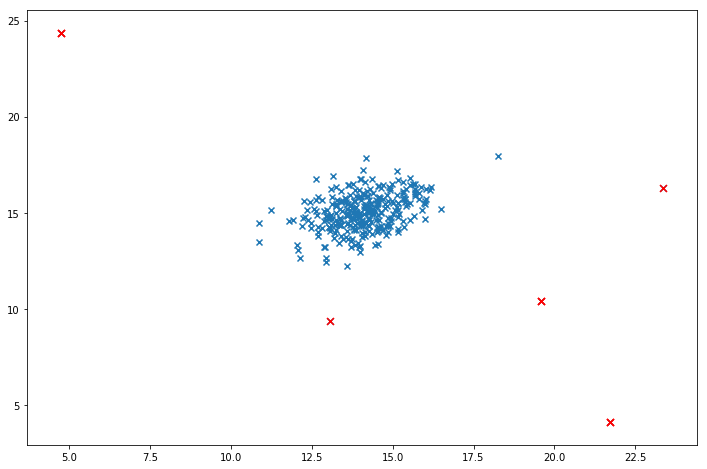

In [38]:
anomalias = np.where(p < epsilon)


fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(X[:,0], X[:,1], marker='x')  
ax.scatter(X[anomalias[0],0], X[anomalias[0],1], s=50, color='r', marker='x')  